# Kolmogorov-Smirnov Test
Vinicius Trevisan 2022

## Imports

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Functions

In [10]:
def cdf(sample, x, sort = False):
    '''
    Return the value of the Cumulative Distribution Function, evaluated for a given sample and a value x.
    
    Args:
        sample: The list or array of observations.
        x: The value for which the numerical cdf is evaluated.
    
    Returns:
        cdf = CDF_{sample}(x)
    '''
    
    # Sorts the sample, if needed
    if sort:
        sample.sort()
    
    # Counts how many observations are below x
    cdf = sum(sample <= x)
    
    # Divides by the total number of observations
    cdf = cdf / len(sample)
    
    return cdf

## Classification evaluation with KS test

### Create synthetic dataset

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
# Parameters for the synthetic data
scale = 5
size = 500

In [13]:
# Generate two classes out of normal distributions - good classifier
class1_good_x = np.random.normal(loc = 10, scale = 1, size = size)
class1_good_y = np.random.normal(loc = 1, scale = 1, size = size)

class2_good_x = np.random.normal(loc = 1, scale = 1, size = size)
class2_good_y = np.random.normal(loc = 5, scale = 1, size = size)

df_class1 = pd.DataFrame({'x' : class1_good_x, 'y' : class1_good_y, 'class': 0})
df_class2 = pd.DataFrame({'x' : class2_good_x, 'y' : class2_good_y, 'class': 1})
df_good = df_class1.append(df_class2, ignore_index = True)

<AxesSubplot:xlabel='x', ylabel='y'>

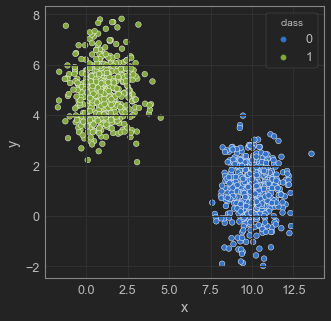

In [14]:
# Plot both to show how much they intersect
plt.figure(figsize=(5, 5))
sns.scatterplot(data = df_good, x = 'x', y = 'y', hue = 'class')

In [15]:
# Generate two classes out of normal distributions - medium classifier
class1_medium_x = np.random.normal(loc = 10, scale = 5, size = size)
class1_medium_y = np.random.normal(loc = 1, scale = 5, size = size)

class2_medium_x = np.random.normal(loc = 1, scale = 5, size = size)
class2_medium_y = np.random.normal(loc = 5, scale = 5, size = size)

df_class1 = pd.DataFrame({'x' : class1_medium_x, 'y' : class1_medium_y, 'class': 0})
df_class2 = pd.DataFrame({'x' : class2_medium_x, 'y' : class2_medium_y, 'class': 1})
df_medium = df_class1.append(df_class2, ignore_index = True)

<AxesSubplot:xlabel='x', ylabel='y'>

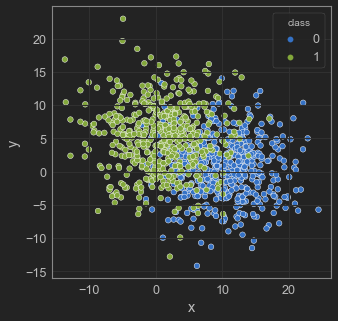

In [16]:
# Plot both to show how much they intersect
plt.figure(figsize=(5, 5))
sns.scatterplot(data = df_medium, x = 'x', y = 'y', hue = 'class')

In [17]:
# Generate two classes out of normal distributions - medium classifier
class1_bad_x = np.random.normal(loc = 10, scale = 5, size = size)
class1_bad_y = np.random.normal(loc = 1, scale = 5, size = size)

class2_bad_x = class1_bad_x + np.random.normal(loc = 1, scale = 1, size = size)
class2_bad_y = class1_bad_y + np.random.normal(loc = 1, scale = 1, size = size)

df_class1 = pd.DataFrame({'x' : class1_bad_x, 'y' : class1_bad_y, 'class': 0})
df_class2 = pd.DataFrame({'x' : class2_bad_x, 'y' : class2_bad_y, 'class': 1})
df_bad = df_class1.append(df_class2, ignore_index = True)

<AxesSubplot:xlabel='x', ylabel='y'>

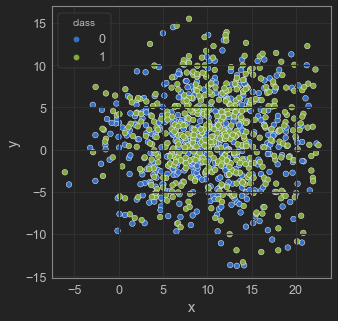

In [18]:
# Plot both to show how much they intersect
plt.figure(figsize=(5, 5))
sns.scatterplot(data = df_bad, x = 'x', y = 'y', hue = 'class')

Text(0.5, 1.0, 'Bad')

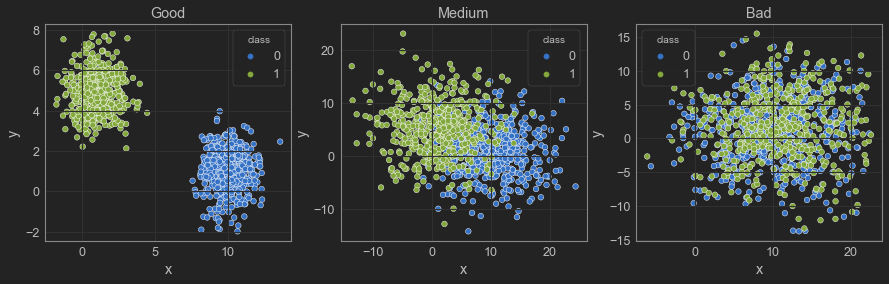

In [19]:
# Plot all three
fig = plt.figure(figsize = (15, 4))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2)
ax3 = plt.subplot(1, 3, 3)
sns.scatterplot(data = df_good, x = 'x', y = 'y', hue = 'class', ax = ax1)
sns.scatterplot(data = df_medium, x = 'x', y = 'y', hue = 'class', ax = ax2)
sns.scatterplot(data = df_bad, x = 'x', y = 'y', hue = 'class', ax = ax3)
ax1.set_title("Good")
ax2.set_title("Medium")
ax3.set_title("Bad")

### Fit a simple classifier for each example
In this case, the default instance of the Naïve Bayes classifier will be used, but really any other can also be used

In [20]:
from sklearn.naive_bayes import GaussianNB

In [21]:
X_good, y_good = df_good.drop(columns = ["class"]), df_good["class"]
X_medium, y_medium = df_medium.drop(columns = ["class"]), df_medium["class"]
X_bad, y_bad = df_bad.drop(columns = ["class"]), df_bad["class"]

In [22]:
# Create the model object
model_good = GaussianNB()
# Fit the model to the training data
model_good.fit(X_good, y_good)
# Predict the classes on the test data
y_pred_good = model_good.predict(X_good)
# Predict the classes on the test data, and return the probabilities for each class
y_proba_good = model_good.predict_proba(X_good)

In [23]:
# Create the model object
model_medium = GaussianNB()
# Fit the model to the training data
model_medium.fit(X_medium, y_medium)
# Predict the classes on the test data
y_pred_medium = model_medium.predict(X_medium)
# Predict the classes on the test data, and return the probabilities for each class
y_proba_medium = model_medium.predict_proba(X_medium)

In [24]:
# Create the model object
model_bad = GaussianNB()
# Fit the model to the training data
model_bad.fit(X_bad, y_bad)
# Predict the classes on the test data
y_pred_bad = model_bad.predict(X_bad)
# Predict the classes on the test data, and return the probabilities for each class
y_proba_bad = model_bad.predict_proba(X_bad)

<AxesSubplot:ylabel='Count'>

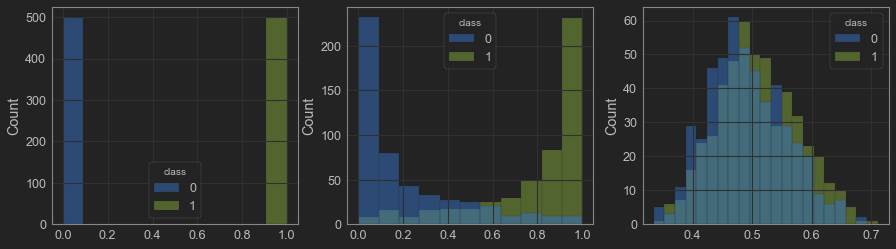

In [25]:
fig = plt.figure(figsize = (15, 4))
sns.histplot(x = y_proba_good[:, 1], hue = y_good, ax = plt.subplot(1, 3, 1))
sns.histplot(x = y_proba_medium[:, 1], hue = y_medium, ax = plt.subplot(1, 3, 2))
sns.histplot(x = y_proba_bad[:, 1], hue = y_bad, ax = plt.subplot(1, 3, 3))

## Evaluate KS for  each classifier

In this case we will use the KS to evaluate whether the distributions of the classes are identical or not

The higher the KS statistic, the better.

In [26]:
from scipy.stats import ks_2samp
from sklearn.metrics import roc_auc_score

In [27]:
def evaluate_ks_and_roc_auc(y_real, y_proba):
    # Unite both visions to be able to filter
    df = pd.DataFrame()
    df['real'] = y_real
    df['proba'] = y_proba[:, 1]
    
    # Recover each class
    class0 = df[df['real'] == 0]
    class1 = df[df['real'] == 1]
    
    ks = ks_2samp(class0['proba'], class1['proba'])
    roc_auc = roc_auc_score(df['real'] , df['proba'])
    
    print(f"KS: {ks.statistic:.4f} (p-value: {ks.pvalue:.3e})")
    print(f"ROC AUC: {roc_auc:.4f}")
    
    return ks.statistic, roc_auc

In [28]:
print("Good classifier:")
ks_good, auc_good = evaluate_ks_and_roc_auc(y_good, y_proba_good)

Good classifier:
KS: 1.0000 (p-value: 7.400e-300)
ROC AUC: 1.0000


In [29]:
print("Medium classifier:")
ks_medium, auc_medium = evaluate_ks_and_roc_auc(y_medium, y_proba_medium)

Medium classifier:
KS: 0.7280 (p-value: 1.336e-128)
ROC AUC: 0.9305


In [30]:
print("Bad classifier:")
ks_bad, auc_bad = evaluate_ks_and_roc_auc(y_bad, y_proba_bad)

Bad classifier:
KS: 0.1240 (p-value: 9.056e-04)
ROC AUC: 0.5749


<AxesSubplot:>

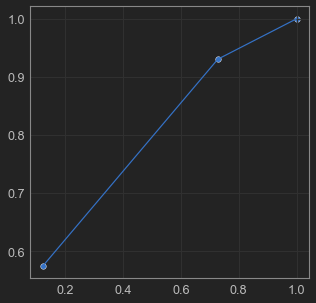

In [31]:
# See the relationship of the scores
plt.figure(figsize = (5,5))
sns.scatterplot(x = [ks_good, ks_medium, ks_bad], y = [auc_good, auc_medium, auc_bad])
sns.lineplot(x = [ks_good, ks_medium, ks_bad], y = [auc_good, auc_medium, auc_bad])

In [72]:
# Gets the class CDFs
def get_classes_cdf(y_real, y_proba):
    # Unite both visions to be able to filter
    df = pd.DataFrame()
    df['real'] = y_real
    df['proba'] = y_proba[:, 1]
    
    # Recover each class
    class0 = df[df['real'] == 0].sort_values('proba')
    class1 = df[df['real'] == 1].sort_values('proba')
    
    # Calculates the cdfs
    cdf0 = np.array([cdf(class0['proba'].values, x, sort = False) for x in class0['proba'].values])
    cdf1 = np.array([cdf(class1['proba'].values, x, sort = False) for x in class1['proba'].values])
    
    # Results
    results =  {
        'cdf0': cdf0,
        'cdf1': cdf1,
        'proba0': class0['proba'].values, 
        'proba1': class1['proba'].values, 
    }
    
    return results

In [73]:
cdf_bad = get_classes_cdf(y_bad, y_proba_bad)
cdf_medium = get_classes_cdf(y_medium, y_proba_medium)
cdf_good = get_classes_cdf(y_good, y_proba_good)

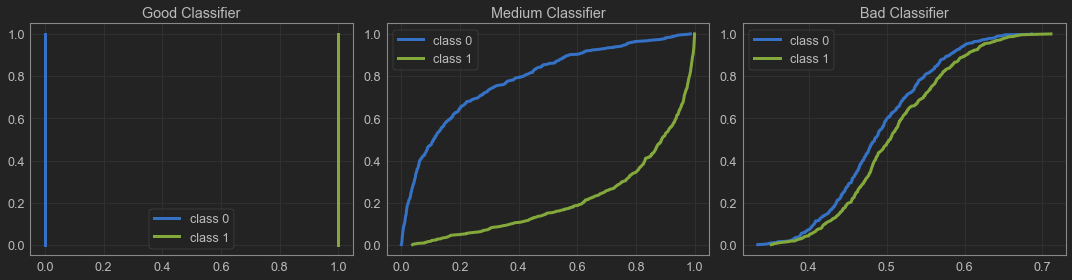

In [85]:
# Visualize them
fig = plt.figure(figsize = (15, 4))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2)
ax3 = plt.subplot(1, 3, 3)

ax1.set_title("Good Classifier")
sns.lineplot(x = cdf_good['proba0'], y = cdf_good['cdf0'], color = 'b', ax = ax1, linewidth = 3)
sns.lineplot(x = cdf_good['proba1'], y = cdf_good['cdf1'], color = 'g', ax = ax1, linewidth = 3)
ax1.legend(["class 0", "class 1"])

ax2.set_title("Medium Classifier")
sns.lineplot(x = cdf_medium['proba0'], y = cdf_medium['cdf0'], color = 'b', ax = ax2, linewidth = 3)
sns.lineplot(x = cdf_medium['proba1'], y = cdf_medium['cdf1'], color = 'g', ax = ax2, linewidth = 3)
ax2.legend(["class 0", "class 1"])

ax3.set_title("Bad Classifier")
sns.lineplot(x = cdf_bad['proba0'], y = cdf_bad['cdf0'], color = 'b', ax = ax3, linewidth = 3)
sns.lineplot(x = cdf_bad['proba1'], y = cdf_bad['cdf1'], color = 'g', ax = ax3, linewidth = 3)
ax3.legend(["class 0", "class 1"])

plt.tight_layout()

## Effect of data unbalance

In [ ]:
# Generate two classes out of normal distributions - medium classifier
df_class1 = pd.DataFrame({'x' : class1_medium_x, 'y' : class1_medium_y, 'class': 0})

# Positive class with 100% of the data
df_class2_100 = pd.DataFrame({'x' : class2_medium_x, 'y' : class2_medium_y, 'class': 1})

# Positive class with 50% of the data
df_class2_50 = df_class2_100.sample(int(df_class2_100.shape[0] * 0.5))

# Positive class with 10% of the data
df_class2_10 = df_class2_100.sample(int(df_class2_100.shape[0] * 0.1))

# Final dataframes
df_100 = df_class1.append(df_class2_100, ignore_index = True)
df_50 = df_class1.append(df_class2_50, ignore_index = True)
df_10 = df_class1.append(df_class2_10, ignore_index = True)

In [ ]:
fig = plt.figure(figsize = (15, 4))
sns.scatterplot(x = 'x', y = 'y', data = df_100, hue = 'class', ax = plt.subplot(1, 3, 1))
sns.scatterplot(x = 'x', y = 'y', data = df_50, hue = 'class', ax = plt.subplot(1, 3, 2))
sns.scatterplot(x = 'x', y = 'y', data = df_10, hue = 'class', ax = plt.subplot(1, 3, 3))

### Fit the classifiers

In [ ]:
# Create the model object
model_100 = GaussianNB()
# Separate X and y
X_100, y_100 = df_100.drop(columns = ['class']), df_100['class']
# Fit the model to the training data
model_100.fit(X_100, y_100)
# Predict the classes on the test data
y_pred_100 = model_100.predict(X_100)
# Predict the classes on the test data, and return the probabilities for each class
y_proba_100 = model_100.predict_proba(X_100)

In [ ]:
# Create the model object
model_50 = GaussianNB()
# Separate X and y
X_50, y_50 = df_50.drop(columns = ['class']), df_50['class']
# Fit the model to the training data
model_50.fit(X_50, y_50)
# Predict the classes on the test data
y_pred_50 = model_50.predict(X_50)
# Predict the classes on the test data, and return the probabilities for each class
y_proba_50 = model_50.predict_proba(X_50)

In [ ]:
# Create the model object
model_10 = GaussianNB()
# Separate X and y
X_10, y_10 = df_10.drop(columns = ['class']), df_10['class']
# Fit the model to the training data
model_10.fit(X_10, y_10)
# Predict the classes on the test data
y_pred_10 = model_10.predict(X_10)
# Predict the classes on the test data, and return the probabilities for each class
y_proba_10 = model_10.predict_proba(X_10)

In [ ]:
fig = plt.figure(figsize = (15, 4))
sns.histplot(x = y_proba_100[:, 1], hue = y_100, ax = plt.subplot(1, 3, 1), kde = True)
sns.histplot(x = y_proba_50[:, 1], hue = y_50, ax = plt.subplot(1, 3, 2), kde = True)
sns.histplot(x = y_proba_10[:, 1], hue = y_10, ax = plt.subplot(1, 3, 3), kde = True)

In [ ]:
print("Balanced data:")
ks_100, auc_100 = evaluate_ks_and_roc_auc(y_100, y_proba_100)

In [ ]:
print("Positive class with 50% of the data:")
ks_50, auc_50 = evaluate_ks_and_roc_auc(y_50, y_proba_50)

In [ ]:
print("Positive class with 10% of the data:")
ks_10, auc_10 = evaluate_ks_and_roc_auc(y_10, y_proba_10)

In [ ]:
100*(0.6780 - 0.6280) / 0.6780

In [ ]:
# See the relationship of the scores
plt.figure(figsize = (5,5))
sns.scatterplot(x = [ks_100, ks_50, ks_10], y = [auc_100, auc_50, auc_10])
sns.lineplot(x = [ks_100, ks_50, ks_10], y = [auc_100, auc_50, auc_10])